# Sai Pavan Kumar M
# Data Science - Batch January 2024 (Hyderabad) - Assignment 7

# Logistic Regression

# Task 1: Data Exploration

In [1]:
import pandas as pd

Loading the datasets

In [2]:
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Examining the features, their types, and summary statistics

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Summary statistics for numerical features

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Summary statistics for categorical features

In [12]:
print(train_data.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [13]:
print(test_data.describe(include=['O']))

                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
freq                   1   266         5                3      270


Creating visualizations

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Creating a histogram for the Age feature in the Titanic_train dataset

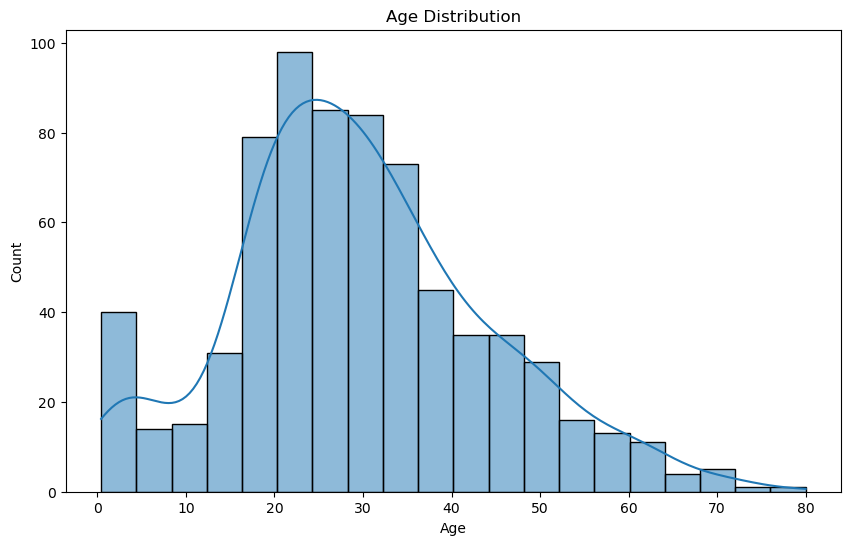

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

Creating a box plot for the Fare feature in the Titanic_train dataset

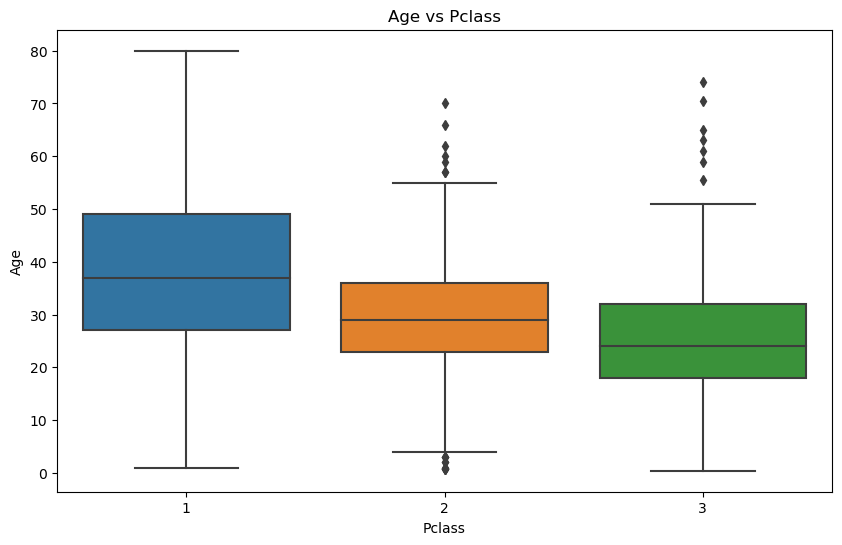

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Age vs Pclass')
plt.show()

Creating a pair plot for the Age and Fare features in the Titanic_train dataset

C:\Users\PAVAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


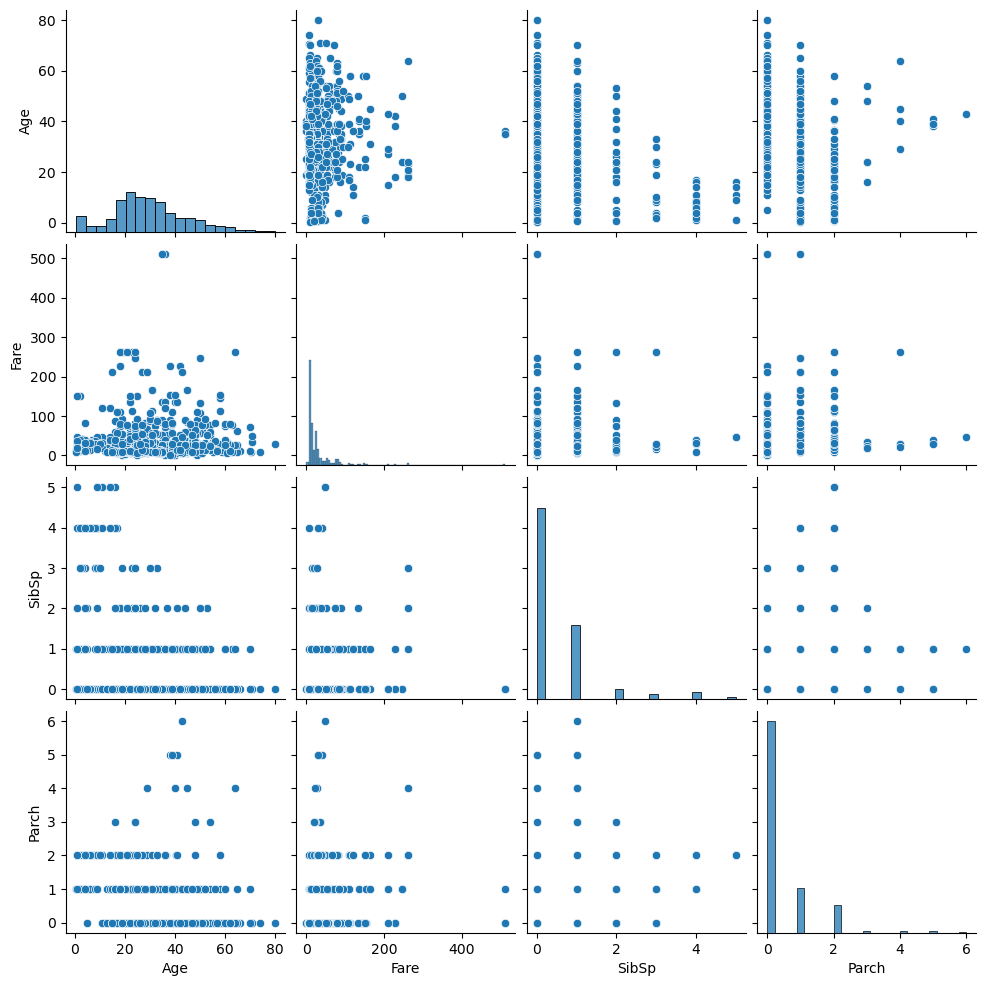

In [17]:
selected_features = ['Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(train_data[selected_features].dropna())
plt.show()

Heatmap of correlations between numerical features

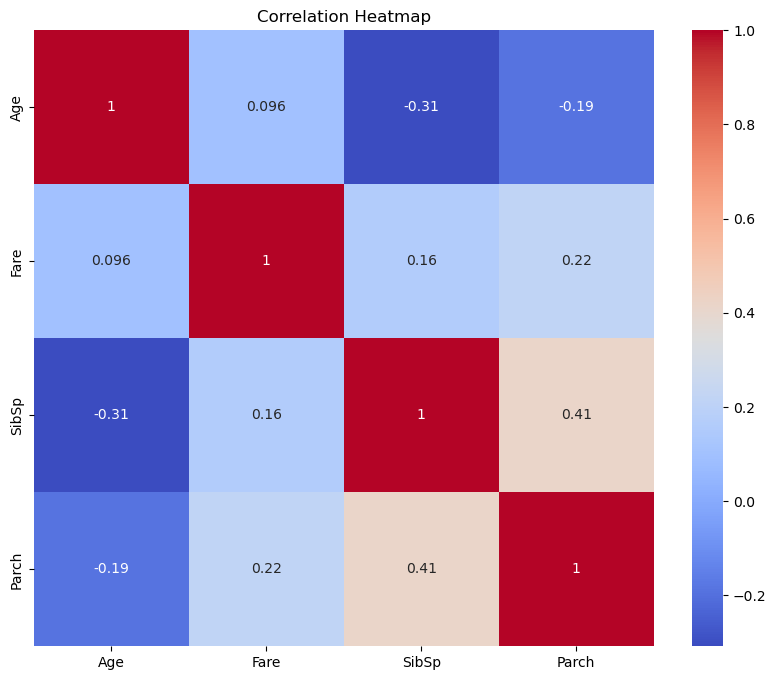

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Task 2: Data Preprocessing

Filling missing Age values with median age

In [19]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

Filling missing Embarked values with the most common port

In [20]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

Filling missing Fare values with median fare

In [21]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

Encoding categorical variables

In [22]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [23]:
train_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


In [24]:
test_data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",27.0,0,0,A.5. 3236,8.0500,NaN,True,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,False,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,True,False,True
416,1308,3,"Ware, Mr. Frederick",27.0,0,0,359309,8.0500,NaN,True,False,True


Ensuring the test data has the same columns as the train data

In [25]:
test_data = test_data.reindex(columns=train_data.columns.drop('Survived'), fill_value=0)

# Task 3: Model Building

Importing necessary libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Defining features and target variable

In [27]:
X_train = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = train_data['Survived']

In [28]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,True
888,889,3,28.0,1,2,23.4500,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False


In [29]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Splitting the training data into training and validation sets

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [31]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,332,1,45.5,0,0,28.5000,True,False,True
733,734,2,23.0,0,0,13.0000,True,False,True
382,383,3,32.0,0,0,7.9250,True,False,True
704,705,3,26.0,1,0,7.8542,True,False,True
813,814,3,6.0,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...,...
106,107,3,21.0,0,0,7.6500,False,False,True
270,271,1,28.0,0,0,31.0000,True,False,True
860,861,3,41.0,2,0,14.1083,True,False,True
435,436,1,14.0,1,2,120.0000,False,False,True


In [32]:
X_val

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
709,710,3,28.0,1,1,15.2458,True,False,False
439,440,2,31.0,0,0,10.5000,True,False,True
840,841,3,20.0,0,0,7.9250,True,False,True
720,721,2,6.0,0,1,33.0000,False,False,True
39,40,3,14.0,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...,...
433,434,3,17.0,0,0,7.1250,True,False,True
773,774,3,28.0,0,0,7.2250,True,False,False
25,26,3,38.0,1,5,31.3875,False,False,True
84,85,2,17.0,0,0,10.5000,False,False,True


In [33]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [34]:
y_val

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

Initializing and train the logistic regression model

In [35]:
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# Task 4: Model Evaluation

Evaluating the Model

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Predicting on the validation set

In [37]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

In [38]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [39]:
y_pred_proba

array([0.1095411 , 0.22260505, 0.1509278 , 0.89463486, 0.67822456,
       0.92883576, 0.69767051, 0.08582456, 0.76133067, 0.91223313,
       0.3171733 , 0.07551463, 0.38414458, 0.12414199, 0.19284964,
       0.9462711 , 0.32606878, 0.72646833, 0.27971331, 0.31248224,
       0.1125865 , 0.41726938, 0.58281178, 0.14349142, 0.11208761,
       0.07655884, 0.40998475, 0.24036662, 0.06847083, 0.58598003,
       0.15674011, 0.62620335, 0.57634403, 0.59209119, 0.12788627,
       0.12060877, 0.42608515, 0.68904978, 0.94530633, 0.11838683,
       0.18408679, 0.08042483, 0.1225593 , 0.17498561, 0.53195019,
       0.07758808, 0.11878653, 0.11829722, 0.10906751, 0.3424369 ,
       0.68823611, 0.83624129, 0.03836994, 0.55704159, 0.05393829,
       0.93679403, 0.19352463, 0.92489261, 0.75936697, 0.73205299,
       0.12680394, 0.85604812, 0.76247684, 0.43377798, 0.14346126,
       0.66437   , 0.28426094, 0.10303944, 0.13499731, 0.87288307,
       0.74359918, 0.94355053, 0.59967094, 0.90979904, 0.13938

Computing evaluation metrics

In [40]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

In [41]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.8045
Precision: 0.7746
Recall: 0.7432
F1 Score: 0.7586
ROC AUC Score: 0.8757


Visualizing the ROC curve

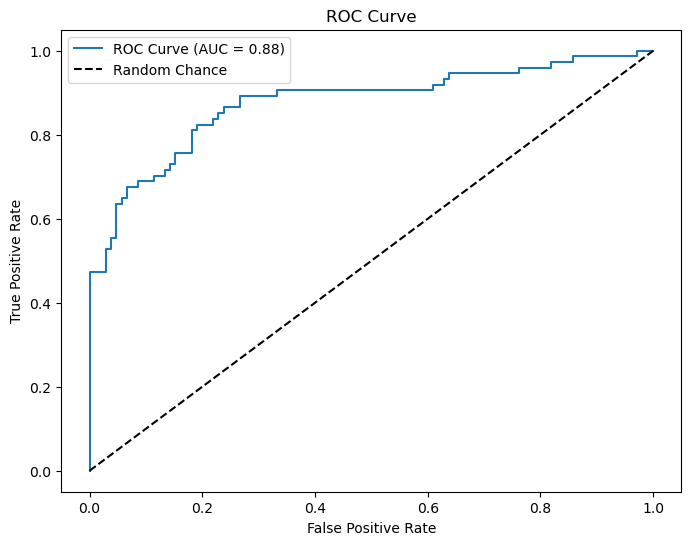

In [42]:
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Task 5: Interpretation

Extracting model coefficients

In [43]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [44]:
feature_importance

,Feature,Coefficient,Importance
6,Sex_male,-2.581720,2.581720
1,Pclass,-0.959450,0.959450
8,Embarked_S,-0.312694,0.312694
3,SibSp,-0.292280,0.292280
7,Embarked_Q,0.124530,0.124530
4,Parch,-0.116283,0.116283
2,Age,-0.030028,0.030028
5,Fare,0.002742,0.002742
0,PassengerId,0.000398,0.000398


Interpretation

In [45]:
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}")

Feature: PassengerId, Coefficient: 0.0004
Feature: Pclass, Coefficient: -0.9595
Feature: Age, Coefficient: -0.0300
Feature: SibSp, Coefficient: -0.2923
Feature: Parch, Coefficient: -0.1163
Feature: Fare, Coefficient: 0.0027
Feature: Sex_male, Coefficient: -2.5817
Feature: Embarked_Q, Coefficient: 0.1245
Feature: Embarked_S, Coefficient: -0.3127


**Discuss the significance of features in predicting the target variable.**

The coefficients represent the log-odds of survival for a one-unit increase in the predictor variable, holding all other variables constant.

A positive coefficient increases the probability of survival, while a negative coefficient decreases it.

# Task 6: Deployment with Streamlit

In [46]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/ef/e1/f9c479f9dbe0bb702ea5ca6608f10e91a708b438f7fb4572a2642718c6e3/streamlit-1.39.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a4/07/14f8ad37f2d12a5ce41206c21820d8cb6561b728e51fad4530dff0552a67/cachetools-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<6,>=3.20 from https://files.pythonhosted.org/packages/7d/46/3fdf7462160135aee6a530f1ec66665b5b4132fa2e1002ab971bc6ec2

In [47]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

Loading the pre-trained model (replace with the actual path or model object)

In [48]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Streamlit app code

In [49]:
import warnings
warnings.filterwarnings('ignore')

st.title('Titanic Survival Prediction')

2024-10-20 15:54:42.239 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.051 
  command:

    streamlit run C:\Users\PAVAN\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-20 15:54:45.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Sidebar inputs

In [50]:
pclass = st.selectbox('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 80, 29)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 6, 0)
fare = st.number_input('Fare', min_value=0.0, max_value=500.0, value=32.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

2024-10-20 15:54:45.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.090 Session state does not function when running a script without `streamlit run`
2024-10-20 15:54:45.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54

Preparing input data

In [51]:
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0]
})

Prediction

In [52]:
if st.button('Predict'):
    survival_probability = model.predict_proba(input_data)[0][1]
    st.write(f'Predicted Survival Probability: {survival_probability:.2f}')

2024-10-20 15:54:45.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-20 15:54:45.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
